# Backtest Helpers Example

This notebook demonstrates how to use the `backtest_helpers` module to run backtests and analyze results.

## 1. Import Helper Functions

## 0. Register Sharadar Bundle

**Important:** Jupyter notebooks don't automatically load bundle extensions, so we need to register the sharadar bundle manually.

In [1]:
# Register the sharadar bundle (required for Jupyter notebooks)
from zipline.data.bundles import register
from zipline.data.bundles.sharadar_bundle import sharadar_bundle

register(
    'sharadar',
    sharadar_bundle(
        tickers=None,
        incremental=True,
        include_funds=True,
    ),
)

# Verify registration
from zipline.data.bundles import bundles
print(f"✓ Sharadar bundle registered!")
print(f"Available bundles: {list(bundles.keys())}")

✓ Sharadar bundle registered!
Available bundles: ['quandl', 'quantopian-quandl', 'csvdir', 'sharadar']


In [2]:
# Import the helper functions
from backtest_helpers import backtest, analyze_results, quick_backtest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

%matplotlib inline

## 2. Run a Backtest

The `backtest()` function runs a backtest and saves results to disk.

**Parameters matching your example:**
- First parameter: algorithm filename
- Second parameter: backtest name/identifier
- Last parameter: output filename

In [3]:
# Run backtest with your exact signature
perf = backtest(
    "backtest_with_fundamentals.py",  # Algorithm file
    "quality-strategy-v1",             # Name/identifier
    bundle="sharadar",
    data_frequency='daily',
    progress='D',
    start_date="2023-04-01",
    end_date="2024-01-31",
    capital_base=100000,
    filepath_or_buffer="quality-strategy-v1.csv"  # Output filename
)

BACKTEST CONFIGURATION
Algorithm: backtest_with_fundamentals.py
Name: quality-strategy-v1
Bundle: sharadar
Data frequency: daily
Progress: D
Start date: 2023-04-01
End date: 2024-01-31
Capital base: $100,000.00

Loading algorithm from: backtest_with_fundamentals.py
✓ CustomFundamentals Database class defined
✓ Algorithm loaded successfully
  Functions found: initialize, before_trading_start, analyze

Detecting custom databases...
✓ Custom loaders configured

Loading bundle: sharadar
✓ Bundle loaded successfully

RUNNING BACKTEST
Start time: 2025-11-12 19:19:09

⚠ Yahoo Finance bundles not available: No module named 'zipline.data.bundles.yahoo_bundle'
⚠ NASDAQ Data Link bundles not available: No module named 'zipline.data.bundles.nasdaq_bundle'
✓ Sharadar bundles registered

Available bundles:
  - yahoo, yahoo-tech, yahoo-dow, yahoo-sp500
  - nasdaq, nasdaq-premium, nasdaq-free, nasdaq-sp500
  - sharadar, sharadar-tech, sharadar-sp500, sharadar-all

Use 'zipline bundles' to see which bu

SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2023-04-03 to 2023-04-11, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(6, 11737), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(6, 11737), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(6, 11737), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(6, 11737), expected_dtype=float64
Creati


BACKTEST CONFIGURATION
Strategy: Quality Factor (Fundamentals-based)
Top N stocks: 10
Rebalance: monthly
Period: 2023-04-01 to 2024-01-31
Initial capital: $100,000.00



SQL query returned 22 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[7.7, 1.8, 6.9], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[68.3, 28.5, 25.1], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.29, 0.68, 0.06], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[0.82, 0.57, 1.44], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[3.59, 0.84, 2.81], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[2043000000.0, 1673000000.0, 18368000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[7192000000.0, 152304000000.0, 74604000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [7.7, 1.8, 6.9]
DEBUG: Column 'ROE' array dtype: float64, shape: (127, 12159)
  Non-NaN count: 11, sample: [32.0, 3.3, 6.9, 4.7, 6.2]
DEBUG: Converted column 'PERatio

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-06-30
  Universe size: 5 stocks
  Avg Quality Score: 0.649
  Avg ROE: 12.2%
  Avg P/E: 29.6

  REBALANCING:
    Sell: 0 positions
    Buy: 5 positions
    Rebalance: 0 positions
    Target weight: 20.00%
      BUY:  AAPL (Score: 0.835, ROE: 32.0%, P/E: 28.5)
      BUY:  GOOGL (Score: 0.629, ROE: 6.9%, P/E: 25.1)
      BUY:  META (Score: 0.623, ROE: 6.2%, P/E: 24.8)
      BUY:  MSFT (Score: 0.596, ROE: 8.4%, P/E: 33.5)
      BUY:  V (Score: 0.561, ROE: 7.3%, P/E: 36.2)

2023-07-31
  Universe size: 1 stocks
  Avg Quality Score: 0.333
  Avg ROE: 8.5%
  Avg P/E: 29.2

  REBALANCING:
    Sell: 5 positions
    Buy: 1 positions
    Rebalance: 0 positions
    Target weight: 100.00%
      SELL: AAPL
      SELL: META
      SELL: GOOGL
      SELL: V
      SELL: MSFT
      BUY:  WMT (Score: 0.333, ROE: 8.5%, P/E: 29.2)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping r

## 3. Inspect Results DataFrame

The backtest returns a DataFrame with performance data.

In [4]:
# View first few rows
print("Results DataFrame:")
print(f"Shape: {perf.shape}")
print(f"Columns: {list(perf.columns)}")
print()
perf.head()

Results DataFrame:
Shape: (209, 40)
Columns: ['period_open', 'period_close', 'ending_exposure', 'starting_value', 'net_leverage', 'ending_value', 'starting_cash', 'ending_cash', 'portfolio_value', 'longs_count', 'shorts_count', 'long_value', 'short_value', 'long_exposure', 'pnl', 'capital_used', 'orders', 'short_exposure', 'transactions', 'gross_leverage', 'positions', 'starting_exposure', 'returns', 'alpha', 'beta', 'algo_volatility', 'sharpe', 'sortino', 'max_leverage', 'excess_return', 'trading_days', 'benchmark_period_return', 'benchmark_volatility', 'period_label', 'max_drawdown', 'treasury_period_return', 'algorithm_period_return', 'daily_returns', 'backtest_name', 'algo_file']



,period_open,period_close,ending_exposure,starting_value,net_leverage,ending_value,starting_cash,ending_cash,portfolio_value,longs_count,shorts_count,long_value,short_value,long_exposure,pnl,capital_used,orders,short_exposure,transactions,gross_leverage,positions,starting_exposure,returns,alpha,beta,algo_volatility,sharpe,sortino,max_leverage,excess_return,trading_days,benchmark_period_return,benchmark_volatility,period_label,max_drawdown,treasury_period_return,algorithm_period_return,daily_returns,backtest_name,algo_file
2023-04-03 20:00:00+00:00,2023-04-03 13:31:00+00:00,2023-04-03 20:00:00+00:00,0.0,0.0,0.0,0.0,100000.0,100000.0,100000.0,0,0,0.0,0.0,0.0,0.0,0.0,[],0.0,[],0.0,[],0.0,0.0,None,None,NaN,NaN,NaN,0.0,0.0,1,0.0,NaN,2023-04,0.0,0.0,0.0,NaN,quality-strategy-v1,backtest_with_fundamentals.py
2023-04-04 20:00:00+00:00,2023-04-04 13:31:00+00:00,2023-04-04 20:00:00+00:00,0.0,0.0,0.0,0.0,100000.0,100000.0,100000.0,0,0,0.0,0.0,0.0,0.0,0.0,[],0.0,[],0.0,[],0.0,0.0,None,None,0.0,NaN,NaN,0.0,0.0,2,0.0,0.0,2023-04,0.0,0.0,0.0,0.0,quality-strategy-v1,backtest_with_fundamentals.py
2023-04-05 20:00:00+00:00,2023-04-05 13:31:00+00:00,2023-04-05 20:00:00+00:00,0.0,0.0,0.0,0.0,100000.0,100000.0,100000.0,0,0,0.0,0.0,0.0,0.0,0.0,[],0.0,[],0.0,[],0.0,0.0,None,None,0.0,NaN,NaN,0.0,0.0,3,0.0,0.0,2023-04,0.0,0.0,0.0,0.0,quality-strategy-v1,backtest_with_fundamentals.py
2023-04-06 20:00:00+00:00,2023-04-06 13:31:00+00:00,2023-04-06 20:00:00+00:00,0.0,0.0,0.0,0.0,100000.0,100000.0,100000.0,0,0,0.0,0.0,0.0,0.0,0.0,[],0.0,[],0.0,[],0.0,0.0,None,None,0.0,NaN,NaN,0.0,0.0,4,0.0,0.0,2023-04,0.0,0.0,0.0,0.0,quality-strategy-v1,backtest_with_fundamentals.py
2023-04-10 20:00:00+00:00,2023-04-10 13:31:00+00:00,2023-04-10 20:00:00+00:00,0.0,0.0,0.0,0.0,100000.0,100000.0,100000.0,0,0,0.0,0.0,0.0,0.0,0.0,[],0.0,[],0.0,[],0.0,0.0,None,None,0.0,NaN,NaN,0.0,0.0,5,0.0,0.0,2023-04,0.0,0.0,0.0,0.0,quality-strategy-v1,backtest_with_fundamentals.py


In [5]:
# View summary statistics
perf[['portfolio_value', 'returns', 'algorithm_period_return']].describe()

,portfolio_value,returns,algorithm_period_return
count,209.000000,209.000000,209.000000
mean,103669.958500,0.000476,0.036700
std,3295.756611,0.008892,0.032958
min,99199.075937,-0.080482,-0.008009
25%,100000.000000,-0.001112,0.000000
50%,103563.423937,0.000000,0.035634
75%,106462.593014,0.004174,0.064626
max,112095.297013,0.022501,0.120953


## 4. Analyze Results with Pyfolio

The `analyze_results()` function loads saved results and generates comprehensive analysis.

LOADING BACKTEST RESULTS
Loading from: backtest_results/quality-strategy-v1.csv
✓ Loaded CSV file
  Rows: 209
  Date range: 2023-04-03 20:00:00+00:00 to 2024-01-31 21:00:00+00:00
  Columns: 40

EXTRACTING RETURNS
✓ Using 'returns' column
  Total return: 9.53%
  Average daily return: 0.0476%
  Daily volatility: 0.8892%

✓ Positions data available
✓ Transactions data available

GENERATING PYFOLIO TEARSHEET


Start date,2023-04-03
End date,2024-01-31
Total months,9
,Backtest
Annual return,11.597%
Cumulative returns,9.527%
Annual volatility,14.116%
Sharpe ratio,0.85
Calmar ratio,1.08
Stability,0.46
Max drawdown,-10.753%


✓ Tearsheet generated

PERFORMANCE METRICS
Total Return: 9.53%
Annual Return: 11.59%
Annual Volatility: 14.12%
Sharpe Ratio: 0.821
Max Drawdown: -10.75%
Calmar Ratio: 1.078
Win Rate: 41.15%
Final Portfolio Value: $109,526.91



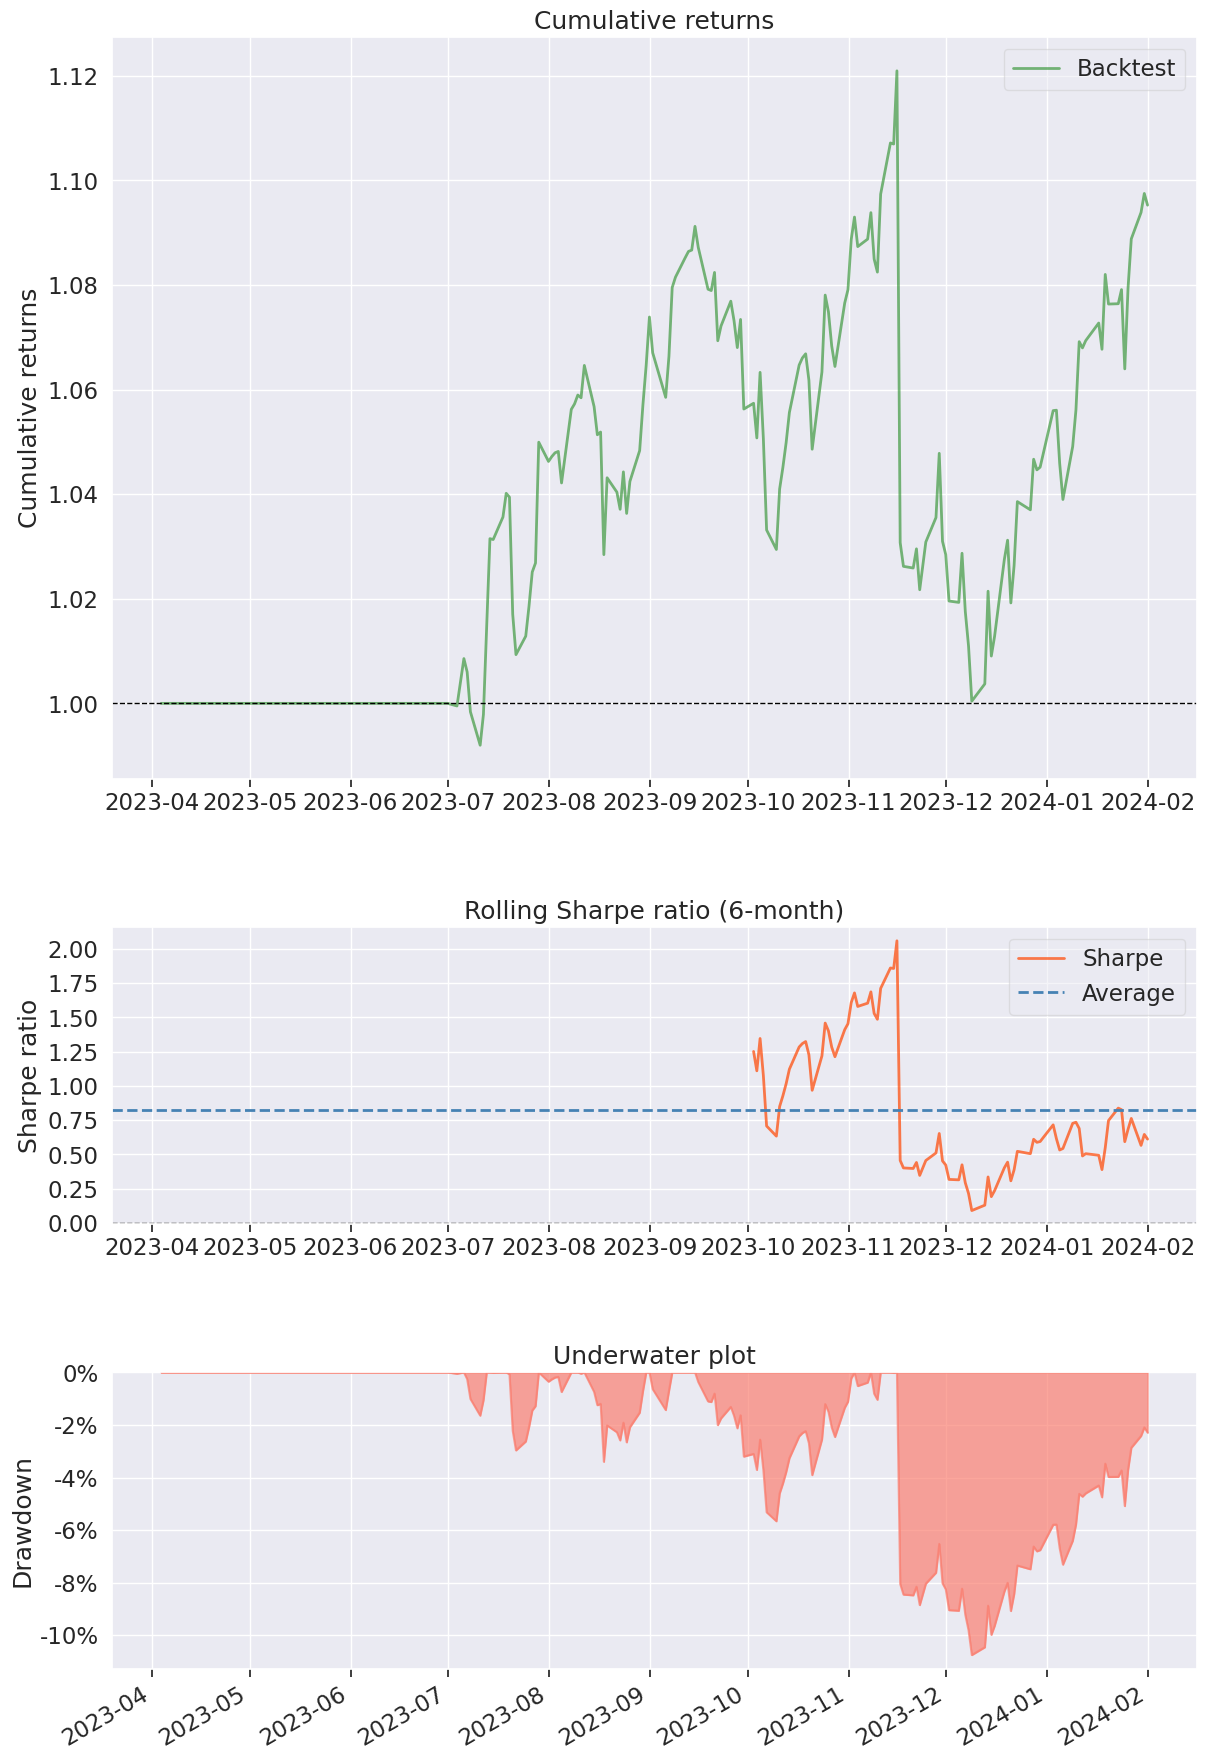

In [6]:
# Analyze the backtest results
results = analyze_results(
    "./backtest_results/quality-strategy-v1.csv",
    benchmark_symbol="SPY",
    show_plots=True,
    return_dict=True
)

In [7]:
# View detailed metrics
print("Performance Metrics:")
for metric, value in results['metrics'].items():
    print(f"  {metric}: {value}")

Performance Metrics:
  Total Return: 9.53%
  Annual Return: 11.59%
  Annual Volatility: 14.12%
  Sharpe Ratio: 0.821
  Max Drawdown: -10.75%
  Calmar Ratio: 1.078
  Win Rate: 41.15%
  Final Portfolio Value: $109,526.91


## 5. Run Multiple Backtests

Example of running multiple backtests with different parameters.

In [8]:
# Define different test scenarios
scenarios = [
    {
        'name': 'short-period',
        'start_date': '2023-01-01',
        'end_date': '2023-06-30',
        'capital_base': 100000,
    },
    {
        'name': 'long-period',
        'start_date': '2022-01-01',
        'end_date': '2023-12-31',
        'capital_base': 100000,
    },
    {
        'name': 'high-capital',
        'start_date': '2023-01-01',
        'end_date': '2023-12-31',
        'capital_base': 1000000,
    },
]

# Run all scenarios
results_dict = {}

for scenario in scenarios:
    name = scenario['name']
    print(f"\n{'='*80}")
    print(f"Running scenario: {name}")
    print(f"{'='*80}\n")
    
    perf = backtest(
        "backtest_with_fundamentals.py",
        name,
        bundle="sharadar",
        start_date=scenario['start_date'],
        end_date=scenario['end_date'],
        capital_base=scenario['capital_base'],
        filepath_or_buffer=f"{name}.csv"
    )
    
    results_dict[name] = perf


Running scenario: short-period

BACKTEST CONFIGURATION
Algorithm: backtest_with_fundamentals.py
Name: short-period
Bundle: sharadar
Data frequency: daily
Progress: D
Start date: 2023-01-01
End date: 2023-06-30
Capital base: $100,000.00

Loading algorithm from: backtest_with_fundamentals.py
✓ CustomFundamentals Database class defined
✓ Algorithm loaded successfully
  Functions found: initialize, before_trading_start, analyze

Detecting custom databases...
✓ Custom loaders configured

Loading bundle: sharadar
✓ Bundle loaded successfully

RUNNING BACKTEST
Start time: 2025-11-12 19:19:11



SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2023-01-03 to 2023-01-10, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creati


BACKTEST CONFIGURATION
Strategy: Quality Factor (Fundamentals-based)
Top N stocks: 10
Rebalance: monthly
Period: 2023-04-01 to 2024-01-31
Initial capital: $100,000.00



SQL query returned 11 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[5.9, 1.6, 4.3], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[24.3, 52.4, 10.8], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.07, 1.04, 11.08], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[1.17, 0.31, 4.1], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[2.89, 1.02, 1.05], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[15051000000.0, 3172000000.0, 12624000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[69787000000.0, 127358000000.0, 38349000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [5.9, 1.6, 4.3]
DEBUG: Column 'ROE' array dtype: float64, shape: (118, 12394)
  Non-NaN count: 9, sample: [47.7, 1.6, 5.9, 4.3, 4.6]
DEBUG: Converted column 'PERati

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-03-31
  Universe size: 5 stocks
  Avg Quality Score: 0.632
  Avg ROE: 15.1%
  Avg P/E: 25.2

  REBALANCING:
    Sell: 0 positions
    Buy: 5 positions
    Rebalance: 0 positions
    Target weight: 20.00%
      BUY:  AAPL (Score: 0.804, ROE: 47.7%, P/E: 26.8)
      BUY:  XOM (Score: 0.691, ROE: 5.7%, P/E: 9.2)
      BUY:  GOOGL (Score: 0.592, ROE: 5.9%, P/E: 24.3)
      BUY:  MSFT (Score: 0.558, ROE: 8.9%, P/E: 31.2)
      BUY:  V (Score: 0.517, ROE: 7.4%, P/E: 34.5)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

BACKTEST RESULTS
Initial Capital: $100,000.00
Final Value:     $109,345.11
Total Return:    9.35%
Sharpe Ratio:    1.79
Max Drawdown:    -3.85%
Win Rate:        26.8%
Total Trades:    124

✓ Detailed results saved to: backtest_results.csv


BACKTEST COMPLETE
End time: 2025-11-12 19:19:13

SA

SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2022-01-03 to 2022-01-10, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(6, 11967), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(6, 11967), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(6, 11967), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(6, 11967), expected_dtype=float64
Creati


BACKTEST CONFIGURATION
Strategy: Quality Factor (Fundamentals-based)
Top N stocks: 10
Rebalance: monthly
Period: 2023-04-01 to 2024-01-31
Initial capital: $100,000.00



SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2022-01-11 to 2022-07-14, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(127, 12658), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(127, 12658), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(127, 12658), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(127, 12658), expected_dtype=float6

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance


SQL query returned 20 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[5.9, 1.6, 4.3], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[24.3, 52.4, 10.8], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.07, 1.04, 11.08], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[1.17, 0.31, 4.1], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[2.89, 1.02, 1.05], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[15051000000.0, 3172000000.0, 12624000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[69787000000.0, 127358000000.0, 38349000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [5.9, 1.6, 4.3]
DEBUG: Column 'ROE' array dtype: float64, shape: (127, 12376)
  Non-NaN count: 18, sample: [47.7, 1.6, 5.9, 4.3, 4.6]
DEBUG: Converted column 'PERat

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-03-31
  Universe size: 5 stocks
  Avg Quality Score: 0.632
  Avg ROE: 15.1%
  Avg P/E: 25.2

  REBALANCING:
    Sell: 0 positions
    Buy: 5 positions
    Rebalance: 0 positions
    Target weight: 20.00%
      BUY:  AAPL (Score: 0.804, ROE: 47.7%, P/E: 26.8)
      BUY:  XOM (Score: 0.691, ROE: 5.7%, P/E: 9.2)
      BUY:  GOOGL (Score: 0.592, ROE: 5.9%, P/E: 24.3)
      BUY:  MSFT (Score: 0.558, ROE: 8.9%, P/E: 31.2)
      BUY:  V (Score: 0.517, ROE: 7.4%, P/E: 34.5)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-06-30
  Universe size: 5 stocks
  Avg Quality Score: 0.64

SQL query returned 13 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[20.4, 8.5, 7.2], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[112.5, 29.2, 23.9], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.26, 0.67, 0.05], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[2.48, 2.77, 1.55], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[3.42, 0.86, 2.75], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[6188000000.0, 7896000000.0, 19689000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[13507000000.0, 161625000000.0, 76693000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [20.4, 8.5, 7.2]
DEBUG: Column 'ROE' array dtype: float64, shape: (114, 11940)
  Non-NaN count: 4, sample: [20.4, 8.5, 26.8, 0.5]
DEBUG: Converted column 'PERatio'


2023-07-31
  Universe size: 1 stocks
  Avg Quality Score: 0.333
  Avg ROE: 8.5%
  Avg P/E: 29.2

  REBALANCING:
    Sell: 5 positions
    Buy: 1 positions
    Rebalance: 0 positions
    Target weight: 100.00%
      SELL: AAPL
      SELL: META
      SELL: GOOGL
      SELL: V
      SELL: MSFT
      BUY:  WMT (Score: 0.333, ROE: 8.5%, P/E: 29.2)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

BACKTEST RESULTS
Initial Capital: $100,000.00
Final Value:     $114,061.05
Total Return:    14.06%
Sharpe Ratio:    0.70
Max Drawdown:    -10.75%
Win Rate:        21.0%
Total Trades:    501

✓ Detailed results saved to: backtest_results.csv


BACKTEST COMPLETE
End time: 2025-11-12 19:19:17

SAVING RESULTS
✓ Saved CSV: backtest_results/long-period.csv
  Size: 245.07 KB
  Rows: 501
✓ Saved pickle: backtest_results/long-pe

SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2023-01-03 to 2023-01-10, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creati


BACKTEST CONFIGURATION
Strategy: Quality Factor (Fundamentals-based)
Top N stocks: 10
Rebalance: monthly
Period: 2023-04-01 to 2024-01-31
Initial capital: $100,000.00



SQL query returned 20 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[5.9, 1.6, 4.3], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[24.3, 52.4, 10.8], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.07, 1.04, 11.08], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[1.17, 0.31, 4.1], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[2.89, 1.02, 1.05], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[15051000000.0, 3172000000.0, 12624000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[69787000000.0, 127358000000.0, 38349000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [5.9, 1.6, 4.3]
DEBUG: Column 'ROE' array dtype: float64, shape: (127, 12425)
  Non-NaN count: 18, sample: [47.7, 1.6, 5.9, 4.3, 4.6]
DEBUG: Converted column 'PERat

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-03-31
  Universe size: 5 stocks
  Avg Quality Score: 0.632
  Avg ROE: 15.1%
  Avg P/E: 25.2

  REBALANCING:
    Sell: 0 positions
    Buy: 5 positions
    Rebalance: 0 positions
    Target weight: 20.00%
      BUY:  AAPL (Score: 0.804, ROE: 47.7%, P/E: 26.8)
      BUY:  XOM (Score: 0.691, ROE: 5.7%, P/E: 9.2)
      BUY:  GOOGL (Score: 0.592, ROE: 5.9%, P/E: 24.3)
      BUY:  MSFT (Score: 0.558, ROE: 8.9%, P/E: 31.2)
      BUY:  V (Score: 0.517, ROE: 7.4%, P/E: 34.5)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-06-30
  Universe size: 5 stocks
  Avg Quality Score: 0.649
  Avg ROE: 12.2%
  Avg P/E: 29.6

  REBALANCING:
    Sell: 1 positions
    Buy: 1 positions
    Rebalance: 4 positions
    Target weight: 20.00%
      SELL: XOM
      BUY:  META (Score: 0.623, ROE: 6.2%, P/E: 24.8)


SQL query returned 13 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[20.4, 8.5, 7.2], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[112.5, 29.2, 23.9], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.26, 0.67, 0.05], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[2.48, 2.77, 1.55], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[3.42, 0.86, 2.75], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[6188000000.0, 7896000000.0, 19689000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[13507000000.0, 161625000000.0, 76693000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [20.4, 8.5, 7.2]
DEBUG: Column 'ROE' array dtype: float64, shape: (117, 11968)
  Non-NaN count: 4, sample: [20.4, 8.5, 26.8, 0.5]
DEBUG: Converted column 'PERatio'


2023-07-31
  Universe size: 1 stocks
  Avg Quality Score: 0.333
  Avg ROE: 8.5%
  Avg P/E: 29.2

  REBALANCING:
    Sell: 5 positions
    Buy: 1 positions
    Rebalance: 0 positions
    Target weight: 100.00%
      SELL: AAPL
      SELL: META
      SELL: GOOGL
      SELL: V
      SELL: MSFT
      BUY:  WMT (Score: 0.333, ROE: 8.5%, P/E: 29.2)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

BACKTEST RESULTS
Initial Capital: $100,000.00
Final Value:     $1,141,406.90
Total Return:    1041.41%
Sharpe Ratio:    1.00
Max Drawdown:    -10.75%
Win Rate:        42.2%
Total Trades:    250

✓ Detailed results saved to: backtest_results.csv


BACKTEST COMPLETE
End time: 2025-11-12 19:19:20

SAVING RESULTS
✓ Saved CSV: backtest_results/high-capital.csv
  Size: 182.45 KB
  Rows: 250
✓ Saved pickle: backtest_results/hi

## 6. Compare Multiple Backtests

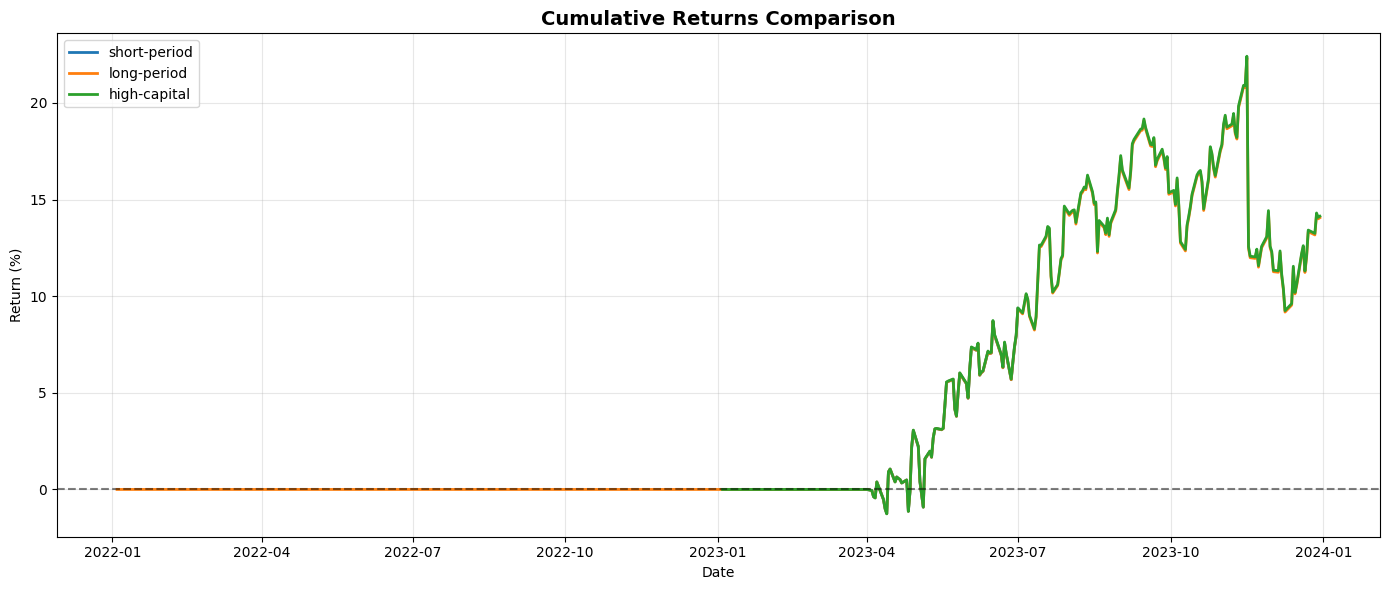

In [9]:
# Compare cumulative returns
fig, ax = plt.subplots(figsize=(14, 6))

for name, perf in results_dict.items():
    # Calculate cumulative returns
    if 'returns' in perf.columns:
        returns = perf['returns']
    else:
        returns = perf['portfolio_value'].pct_change().fillna(0)
    
    cumulative = (returns + 1).cumprod() - 1
    ax.plot(perf.index, cumulative * 100, label=name, linewidth=2)

ax.set_title('Cumulative Returns Comparison', fontsize=14, fontweight='bold')
ax.set_ylabel('Return (%)')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [10]:
# Create comparison table
comparison_data = []

for name, perf in results_dict.items():
    if 'returns' in perf.columns:
        returns = perf['returns']
    else:
        returns = perf['portfolio_value'].pct_change().fillna(0)
    
    total_return = (returns + 1).cumprod()[-1] - 1
    annual_vol = returns.std() * np.sqrt(252)
    sharpe = (returns.mean() / returns.std() * np.sqrt(252)) if returns.std() > 0 else 0
    
    cumulative = (returns + 1).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_dd = drawdown.min()
    
    comparison_data.append({
        'Scenario': name,
        'Total Return': f"{total_return:.2%}",
        'Annual Vol': f"{annual_vol:.2%}",
        'Sharpe': f"{sharpe:.3f}",
        'Max DD': f"{max_dd:.2%}",
        'Final Value': f"${perf['portfolio_value'].iloc[-1]:,.0f}",
    })

comparison_df = pd.DataFrame(comparison_data)
print("\nBacktest Comparison:")
print(comparison_df.to_string(index=False))


Backtest Comparison:
    Scenario Total Return Annual Vol Sharpe  Max DD Final Value
short-period        9.35%     10.49%  1.784  -3.85%    $109,345
 long-period       14.06%     10.19%  0.701 -10.75%    $114,061
high-capital       14.14%     14.45%  0.996 -10.75%  $1,141,407


## 7. Quick Backtest

For rapid testing, use `quick_backtest()` to run and analyze in one step.

BACKTEST CONFIGURATION
Algorithm: backtest_with_fundamentals.py
Name: quick-test
Bundle: sharadar
Data frequency: daily
Progress: D
Start date: 2023-01-01
End date: 2023-12-31
Capital base: $100,000.00

Loading algorithm from: backtest_with_fundamentals.py
✓ CustomFundamentals Database class defined
✓ Algorithm loaded successfully
  Functions found: initialize, before_trading_start, analyze

Detecting custom databases...
✓ Custom loaders configured

Loading bundle: sharadar
✓ Bundle loaded successfully

RUNNING BACKTEST
Start time: 2025-11-12 19:19:20



SQL query returned 0 rows for 7 columns from fundamentals database
No data found in fundamentals database for dates 2023-01-03 to 2023-01-10, sids ['0', '2', '3', '8', '12']...
DEBUG: Column 'ROE' created empty array with dtype: float64
DEBUG: Column 'PERatio' created empty array with dtype: float64
DEBUG: Column 'DebtToEquity' created empty array with dtype: float64
DEBUG: Column 'EPS' created empty array with dtype: float64
DEBUG: Column 'CurrentRatio' created empty array with dtype: float64
DEBUG: Column 'NetIncome' created empty array with dtype: float64
DEBUG: Column 'Revenue' created empty array with dtype: float64
Creating AdjustedArray for ROE: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for PERatio: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for DebtToEquity: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creating AdjustedArray for EPS: dtype=float64, shape=(6, 12094), expected_dtype=float64
Creati


BACKTEST CONFIGURATION
Strategy: Quality Factor (Fundamentals-based)
Top N stocks: 10
Rebalance: monthly
Period: 2023-04-01 to 2024-01-31
Initial capital: $100,000.00



SQL query returned 20 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[5.9, 1.6, 4.3], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[24.3, 52.4, 10.8], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.07, 1.04, 11.08], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[1.17, 0.31, 4.1], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[2.89, 1.02, 1.05], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[15051000000.0, 3172000000.0, 12624000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[69787000000.0, 127358000000.0, 38349000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [5.9, 1.6, 4.3]
DEBUG: Column 'ROE' array dtype: float64, shape: (127, 12425)
  Non-NaN count: 18, sample: [47.7, 1.6, 5.9, 4.3, 4.6]
DEBUG: Converted column 'PERat

  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-03-31
  Universe size: 5 stocks
  Avg Quality Score: 0.632
  Avg ROE: 15.1%
  Avg P/E: 25.2

  REBALANCING:
    Sell: 0 positions
    Buy: 5 positions
    Rebalance: 0 positions
    Target weight: 20.00%
      BUY:  AAPL (Score: 0.804, ROE: 47.7%, P/E: 26.8)
      BUY:  XOM (Score: 0.691, ROE: 5.7%, P/E: 9.2)
      BUY:  GOOGL (Score: 0.592, ROE: 5.9%, P/E: 24.3)
      BUY:  MSFT (Score: 0.558, ROE: 8.9%, P/E: 31.2)
      BUY:  V (Score: 0.517, ROE: 7.4%, P/E: 34.5)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

2023-06-30
  Universe size: 5 stocks
  Avg Quality Score: 0.649
  Avg ROE: 12.2%
  Avg P/E: 29.6

  REBALANCING:
    Sell: 1 positions
    Buy: 1 positions
    Rebalance: 4 positions
    Target weight: 20.00%
      SELL: XOM
      BUY:  META (Score: 0.623, ROE: 6.2%, P/E: 24.8)


SQL query returned 13 rows for 7 columns from fundamentals database
Raw DataFrame dtypes from SQLite:
  ROE: dtype=float64, sample=[20.4, 8.5, 7.2], types=['float', 'float', 'float']
  PERatio: dtype=float64, sample=[112.5, 29.2, 23.9], types=['float', 'float', 'float']
  DebtToEquity: dtype=float64, sample=[0.26, 0.67, 0.05], types=['float', 'float', 'float']
  EPS: dtype=float64, sample=[2.48, 2.77, 1.55], types=['float', 'float', 'float']
  CurrentRatio: dtype=float64, sample=[3.42, 0.86, 2.75], types=['float', 'float', 'float']
  NetIncome: dtype=float64, sample=[6188000000.0, 7896000000.0, 19689000000.0], types=['float', 'float', 'float']
  Revenue: dtype=float64, sample=[13507000000.0, 161625000000.0, 76693000000.0], types=['float', 'float', 'float']
DEBUG: Converted column 'ROE' from float64 to float64. Sample values: [20.4, 8.5, 7.2]
DEBUG: Column 'ROE' array dtype: float64, shape: (117, 11968)
  Non-NaN count: 4, sample: [20.4, 8.5, 26.8, 0.5]
DEBUG: Converted column 'PERatio'


2023-07-31
  Universe size: 1 stocks
  Avg Quality Score: 0.333
  Avg ROE: 8.5%
  Avg P/E: 29.2

  REBALANCING:
    Sell: 5 positions
    Buy: 1 positions
    Rebalance: 0 positions
    Target weight: 100.00%
      SELL: AAPL
      SELL: META
      SELL: GOOGL
      SELL: V
      SELL: MSFT
      BUY:  WMT (Score: 0.333, ROE: 8.5%, P/E: 29.2)
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance
  ⚠ No stocks in universe, skipping rebalance

BACKTEST RESULTS
Initial Capital: $100,000.00
Final Value:     $114,061.05
Total Return:    14.06%
Sharpe Ratio:    0.99
Max Drawdown:    -10.75%
Win Rate:        42.2%
Total Trades:    250

✓ Detailed results saved to: backtest_results.csv


BACKTEST COMPLETE
End time: 2025-11-12 19:19:22

SAVING RESULTS
✓ Saved CSV: backtest_results/quick-test.csv
  Size: 180.03 KB
  Rows: 250
✓ Saved pickle: backtest_results/quick-te

Start date,2023-01-03
End date,2023-12-29
Total months,11
,Backtest
Annual return,14.181%
Cumulative returns,14.061%
Annual volatility,14.427%
Sharpe ratio,0.99
Calmar ratio,1.32
Stability,0.78
Max drawdown,-10.753%


✓ Tearsheet generated

PERFORMANCE METRICS
Total Return: 14.06%
Annual Return: 14.28%
Annual Volatility: 14.43%
Sharpe Ratio: 0.990
Max Drawdown: -10.75%
Calmar Ratio: 1.328
Win Rate: 42.00%
Final Portfolio Value: $114,061.05



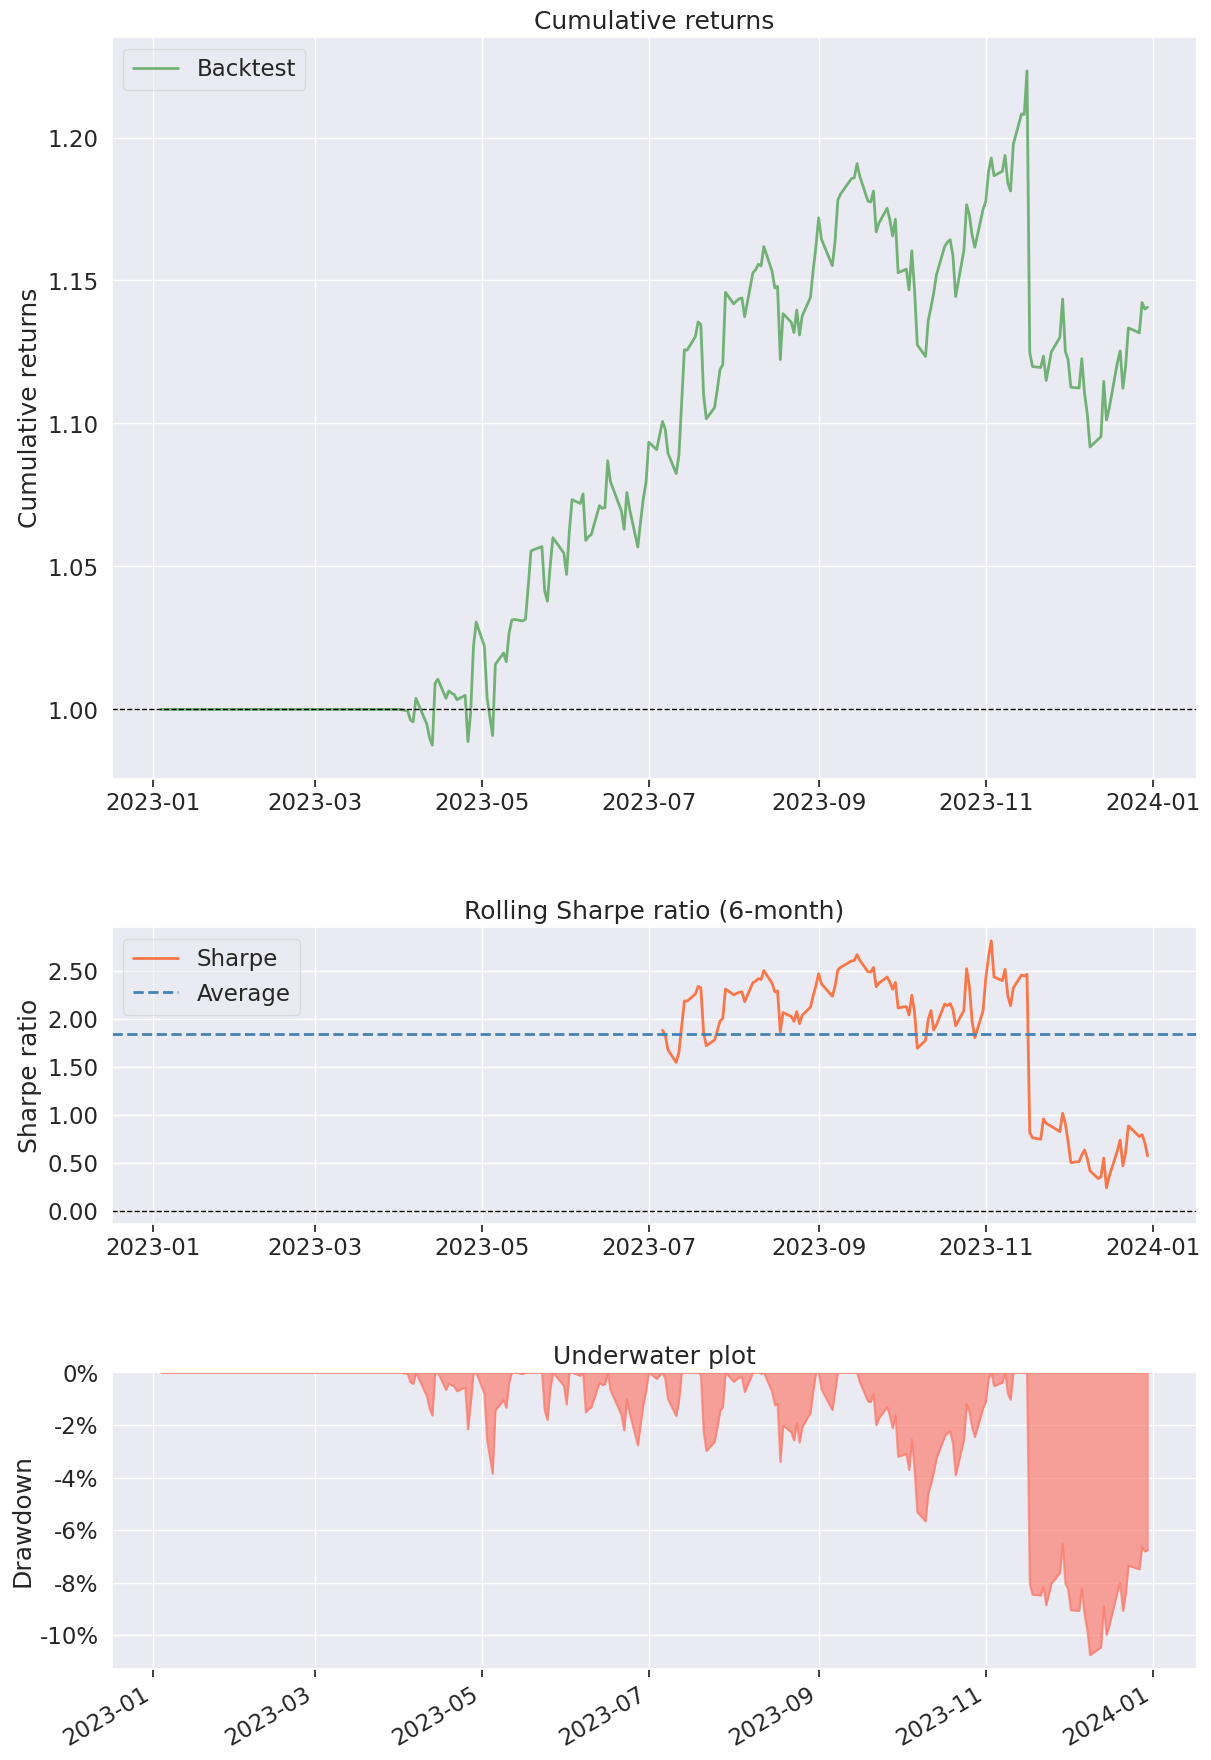

In [11]:
# Quick backtest - runs and analyzes automatically
perf = quick_backtest(
    "backtest_with_fundamentals.py",
    name="quick-test",
    start_date="2023-01-01",
    end_date="2023-12-31",
    capital_base=100000,
    bundle="sharadar",
)

## 8. Reload Previous Results

You can analyze previously saved results without re-running the backtest.

LOADING BACKTEST RESULTS
Loading from: backtest_results/quality-strategy-v1.csv
✓ Loaded CSV file
  Rows: 209
  Date range: 2023-04-03 20:00:00+00:00 to 2024-01-31 21:00:00+00:00
  Columns: 40

EXTRACTING RETURNS
✓ Using 'returns' column
  Total return: 9.53%
  Average daily return: 0.0476%
  Daily volatility: 0.8892%

✓ Positions data available
✓ Transactions data available

GENERATING PYFOLIO TEARSHEET


Start date,2023-04-03
End date,2024-01-31
Total months,9
,Backtest
Annual return,11.597%
Cumulative returns,9.527%
Annual volatility,14.116%
Sharpe ratio,0.85
Calmar ratio,1.08
Stability,0.46
Max drawdown,-10.753%


✓ Tearsheet generated

PERFORMANCE METRICS
Total Return: 9.53%
Annual Return: 11.59%
Annual Volatility: 14.12%
Sharpe Ratio: 0.821
Max Drawdown: -10.75%
Calmar Ratio: 1.078
Win Rate: 41.15%
Final Portfolio Value: $109,526.91



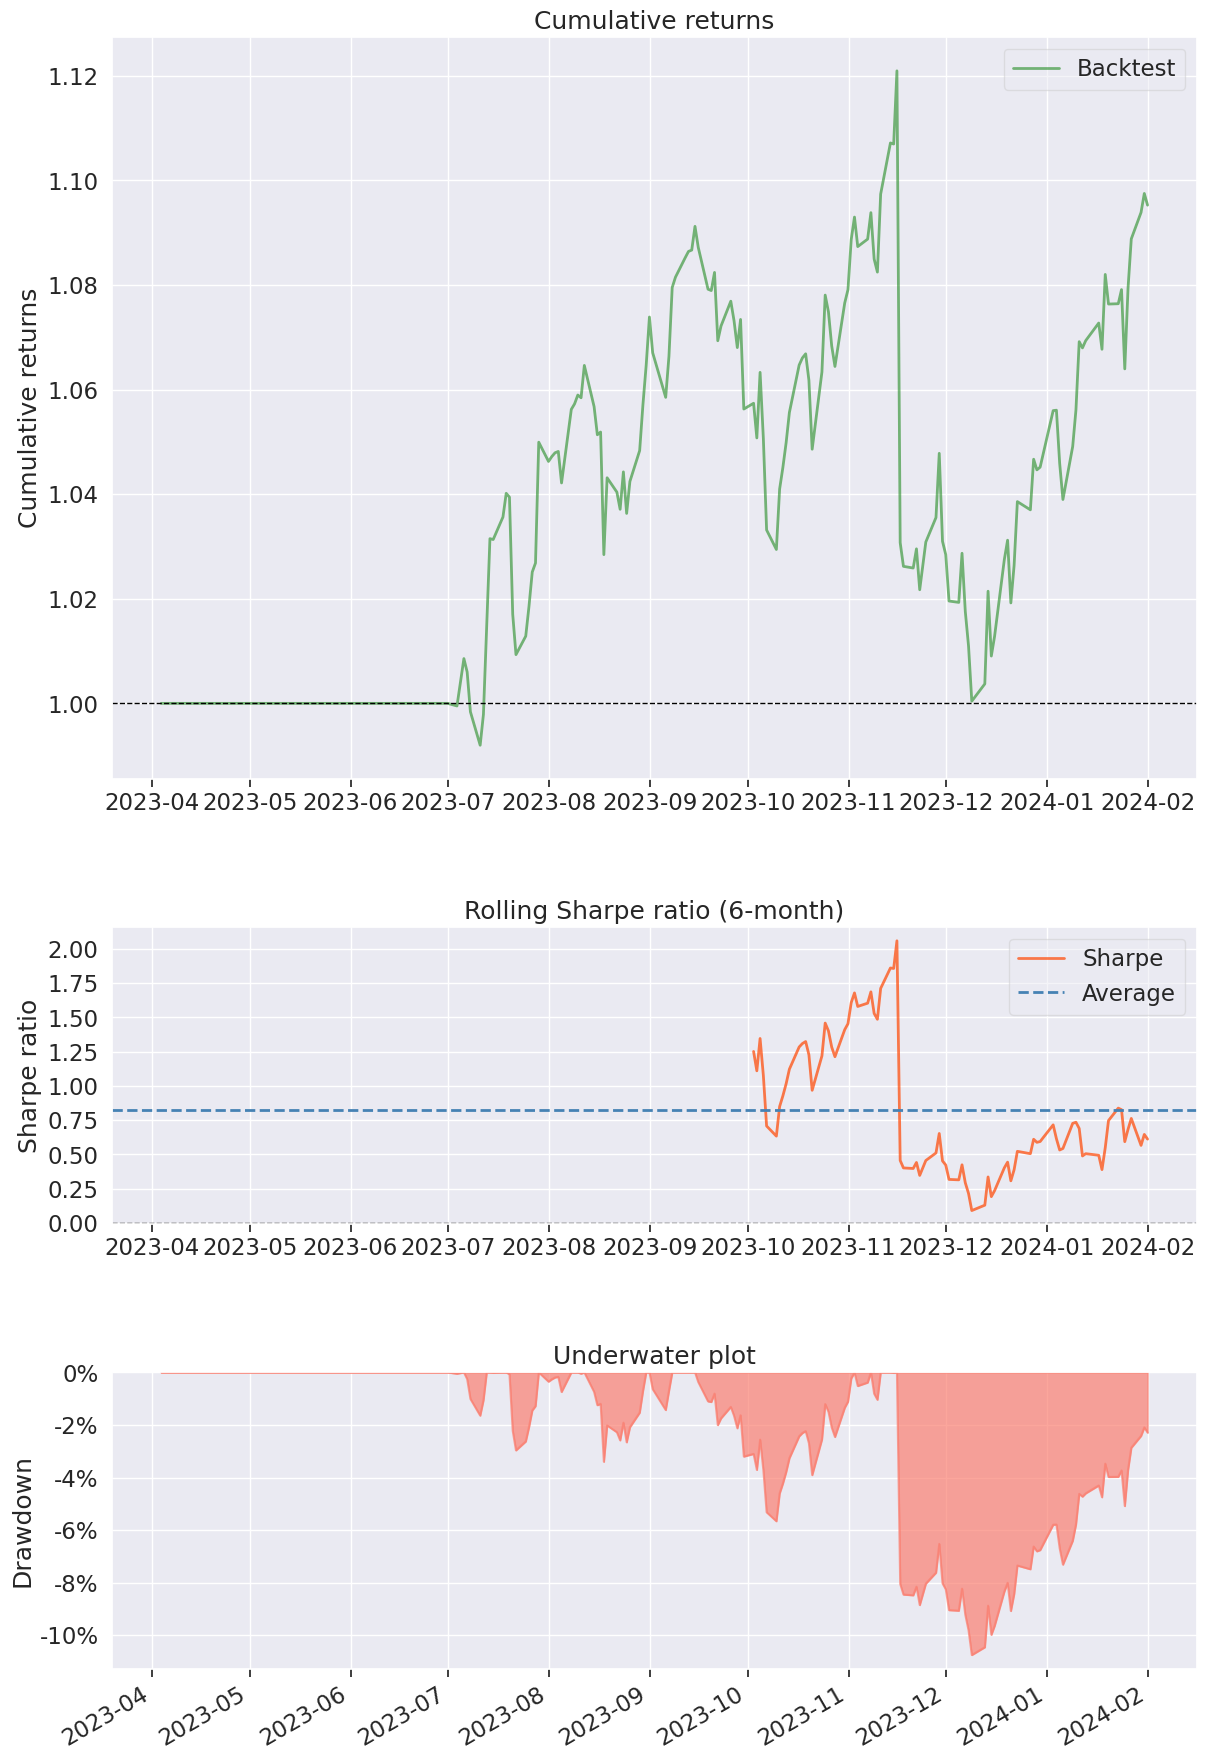

In [12]:
# Analyze a previously saved backtest
analyze_results(
    "./backtest_results/quality-strategy-v1.csv",
    benchmark_symbol="SPY",
    show_plots=True
)

## 9. Custom Analysis

Load results and perform custom analysis.

LOADING BACKTEST RESULTS
Loading from: backtest_results/quality-strategy-v1.csv
✓ Loaded CSV file
  Rows: 209
  Date range: 2023-04-03 20:00:00+00:00 to 2024-01-31 21:00:00+00:00
  Columns: 40

EXTRACTING RETURNS
✓ Using 'returns' column
  Total return: 9.53%
  Average daily return: 0.0476%
  Daily volatility: 0.8892%

✓ Positions data available
✓ Transactions data available

GENERATING PYFOLIO TEARSHEET

PERFORMANCE METRICS
Total Return: 9.53%
Annual Return: 11.59%
Annual Volatility: 14.12%
Sharpe Ratio: 0.821
Max Drawdown: -10.75%
Calmar Ratio: 1.078
Win Rate: 41.15%
Final Portfolio Value: $109,526.91



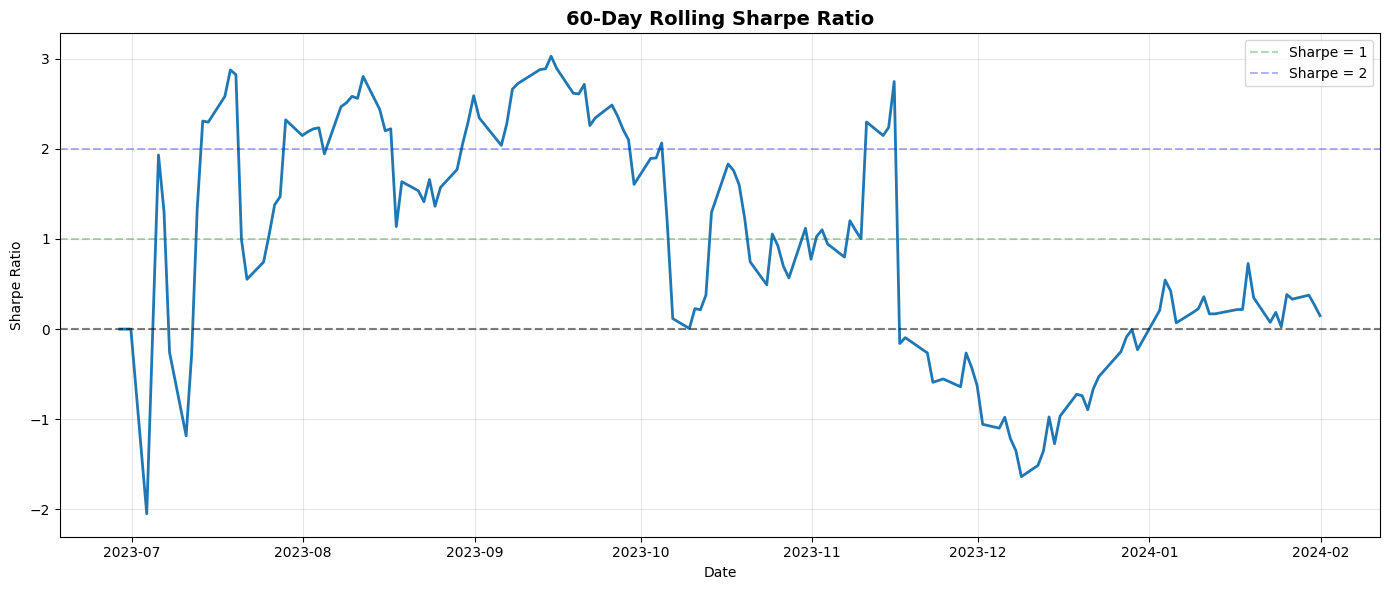

In [13]:
# Load results with full details
results = analyze_results(
    "./backtest_results/quality-strategy-v1.csv",
    show_plots=False,
    return_dict=True
)

# Access components
returns = results['returns']
perf = results['perf']
metrics = results['metrics']

# Custom analysis: Rolling Sharpe ratio
rolling_sharpe = (
    returns.rolling(window=60)
    .apply(lambda x: x.mean() / x.std() * np.sqrt(252) if x.std() > 0 else 0)
)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(rolling_sharpe.index, rolling_sharpe, linewidth=2)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.axhline(y=1, color='green', linestyle='--', alpha=0.3, label='Sharpe = 1')
ax.axhline(y=2, color='blue', linestyle='--', alpha=0.3, label='Sharpe = 2')
ax.set_title('60-Day Rolling Sharpe Ratio', fontsize=14, fontweight='bold')
ax.set_ylabel('Sharpe Ratio')
ax.set_xlabel('Date')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Summary

The `backtest_helpers` module provides:

1. **`backtest()`** - Run backtest and save results
   - First param: algorithm filename
   - Second param: backtest name
   - Last param: output filename
   - Saves CSV, pickle, and metadata

2. **`analyze_results()`** - Load and analyze saved results
   - Generates pyfolio tearsheet
   - Creates performance plots
   - Calculates comprehensive metrics

3. **`quick_backtest()`** - Run and analyze in one step
   - Convenient for rapid iteration

All results are saved to `./backtest_results/` by default and can be reloaded anytime.